<a href="https://colab.research.google.com/github/Roshan-pro/Data-science-department/blob/main/data_science_statistical_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset
🚗 **Uber Ride Analytics Dataset 2024**<br>
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

**📊 Dataset Overview**<br>
The dataset captures 148,770 total bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics. -

**Key Statistics:** <br>
Total Bookings: 148.77K rides <br>
Success Rate: 65.96% (93K completed rides)<br>
Cancellation Rate: 25% (37.43K cancelled bookings)<br>
Customer Cancellations: 19.15% (27K rides)<br>
Driver Cancellations: 7.45% (10.5K rides)

# Questions & Hypotheses Tested
1. Is the average booking value significantly higher than ₹350?<br>
**Hypotheses:**
- H0:μ=350
- H1:μ>350

2. Does booking value differ between UPI and Cash payments?<br>
**Hypotheses:**
- H0:μUPI =μCash
- H1:μUPI≠μCash

3. Did average VTAT reduce after a system update?<br>
Update Date: June 15, 2024<br>

**Hypotheses:**

- H0:μdiff=0 (no reduction)
- H1:μdiff>0 (reduction)

4. Is there a relationship between payment method and booking status?<br>
**Hypotheses:**
- H0 : Payment method and booking status are independent
- H1 : They are dependent

5. Does ride distance affect fare?<br>
**Hypotheses:**
- H0:ρ=0 (no correlation)
- H1:ρ≠0 (correlation exists)



In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")
pd.set_option('display.max_columns', None)


In [ ]:
uber_ride=pd.read_csv(r"/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")
uber_ride.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
print("Percentage of null values :",(uber_ride.isna().sum().sum()/uber_ride.shape[0]),"%")

Percentage of null values : 7.49 %


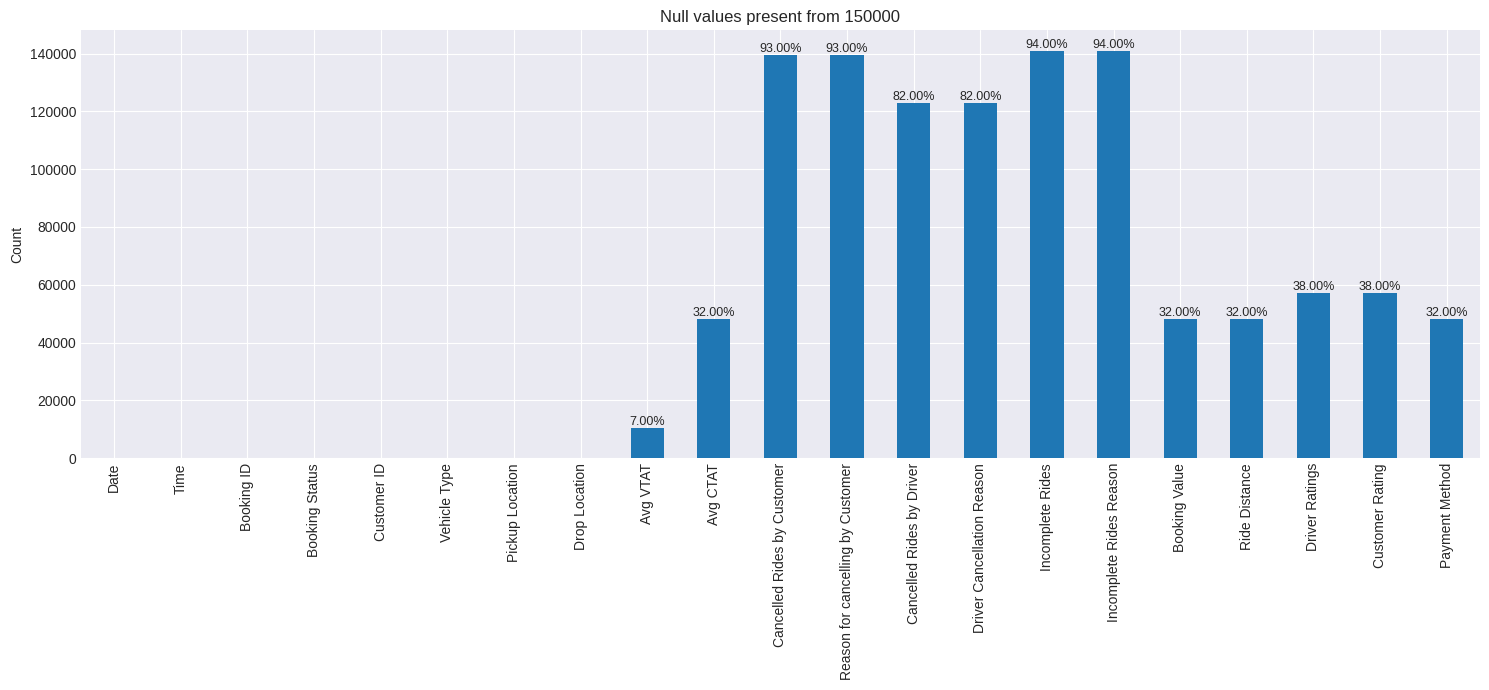

In [ ]:
null_perc = (uber_ride.isna().sum() / uber_ride.shape[0]) * 100
plt.figure(figsize=(15,7))
ax=uber_ride.isna().sum().plot(kind="bar",
                           title=f"Null values present from {uber_ride.shape[0]}"
                           )
for i,v in enumerate(uber_ride.isna().sum()):
    if v>0:
        ax.text(i,v,
               f"{null_perc[i]:.2f}%",
               ha="center",
               va="bottom",
               fontsize=9
               )
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**From above graph**<br>
- Cancelled Rides by Customer , Reason for cancelling by Customer , Cancelled Rides by Driver , Driver Cancellation Reason,<br>
    Incomplete Rides and Incomplete Rides Reason has high null value present

In [ ]:
uber_ride.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# **Statistical Validation of Urban Ride-Hailing Systems using Uber Data**

# **Question:1 - Is average Booking Value significantly higher than ₹350?**


**Hypothesis** :<br>
    - ho : μ = 350 (Null Hypothesis) <br>
    - h1 : μ > 350 (Alternate Hypothesis)

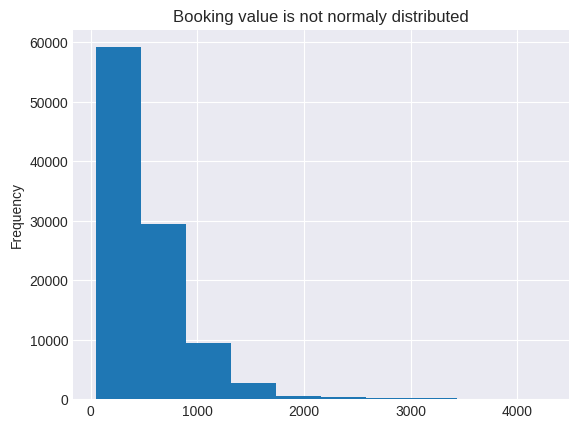

In [ ]:
uber_ride["Booking Value"].plot(kind="hist",
                               title = "Booking value is not normaly distributed")
plt.show()

**Taking sample data (booking value) 50**

In [ ]:
booking_value = uber_ride["Booking Value"].dropna().sample(20,random_state=42)
print("Sample size of Booking Value :",len(booking_value))
print("Null value present :",booking_value.isna().sum().any())

Sample size of Booking Value : 20
Null value present : False


<Axes: ylabel='Frequency'>

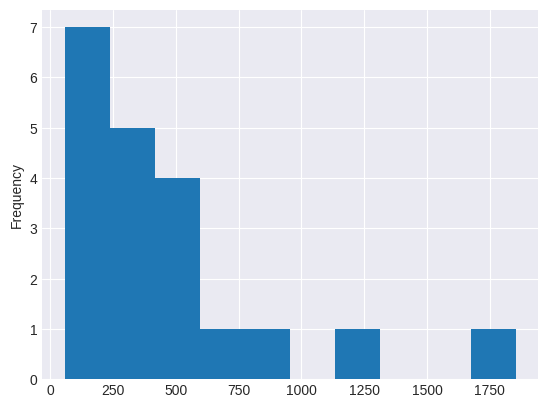

In [ ]:
booking_value.plot(kind="hist")

**Perform test**
- T-test

![image.png](attachment:af2ec657-afab-407e-81ce-b56bff79fdae.png)

![image.png](attachment:36328b90-26d1-4869-bab0-d9e173b1c61e.png)

In [ ]:
def calculate_sample_variance_manual(data):
    n = len(data)
    mean = np.mean(data)
    squared_deviations = [(x - mean) ** 2 for x in data]
    variance = sum(squared_deviations) / (n - 1)  # n-1 for sample variance
    return variance

In [ ]:
mean_bv=booking_value.mean()
t_test=(mean_bv-350)/(calculate_sample_variance_manual(booking_value)/np.sqrt(len(booking_value)))

In [ ]:
alpha = 0.05
if t_test < alpha:
    print("Reject null hypothesis: The Average Booking Value  is greather than 350")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis: The Average Booking Value  is greather than 350


In [ ]:
mean = np.mean(booking_value)
std = booking_value.std()
n = len(booking_value)
df = n - 1
alpha = 0.05
t = stats.t.ppf(1 - alpha, df)

moe = t * (std / np.sqrt(n))

lower = mean - moe
upper = mean + moe

print("95% Confidence Interval for Mean:")
print(f"95% CI: ({lower:.2f}, {upper:.2f})")
print("Actual average booking value:",uber_ride["Booking Value"].mean())

95% Confidence Interval for Mean:
95% CI: (312.94, 646.76)
Actual average booking value: 508.29591176470586


# **Question-2 : Does Booking Value differ between UPI vs Cash?**

<Axes: xlabel='Payment Method'>

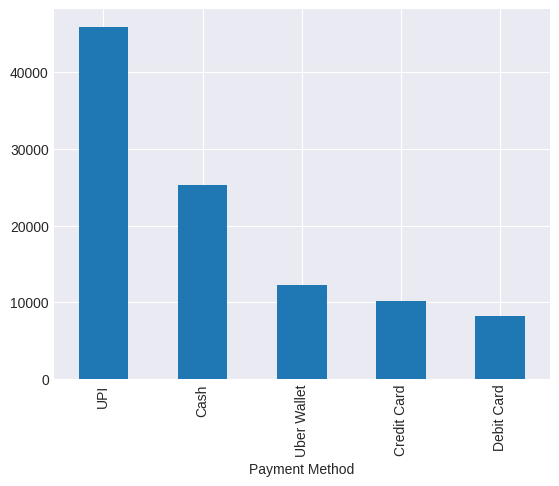

In [ ]:
uber_ride["Payment Method"].value_counts().plot(kind="bar")

In [ ]:
booking_value_upi=uber_ride[uber_ride["Payment Method"]=="UPI"]["Booking Value"].dropna().sample(50,random_state=42)
booking_value_cash=uber_ride[uber_ride["Payment Method"]=="Cash"]["Booking Value"].dropna().sample(50,random_state=42)
print("Number of samples in booking using upi:",len(booking_value_upi),"and null value present :",booking_value_upi.isna().sum().any())
print("Number of samples in booking using cash:",len(booking_value_cash),"and null value present :",booking_value_cash.isna().sum().any())

Number of samples in booking using upi: 50 and null value present : False
Number of samples in booking using cash: 50 and null value present : False


**Hypothesis :**<br>
H₀: Distribution (or median) of Booking Value is the same for UPI and Cash

H₁: Distribution (or median) of Booking Value differs between UPI and Cash
- ho : μ
UPI
	​ =μ Cash
	​
- h1: μ UPI
	​ ≠ μ
Cash
	​


**Performing t-test in sample of 50 data**

![image.png](attachment:efe18050-8b0f-4df3-b6a4-4035ceb12762.png)


![image.png](attachment:83a2ac2b-dc6a-470f-b741-2abb632ce834.png)

In [ ]:
t_val,p_val =stats.ttest_ind(booking_value_upi,booking_value_cash,equal_var=False)
alpha=0.05
degree_of_freedom=len(booking_value_upi) + len(booking_value_cash) -2 #n1+n2-2
crit_t = stats.t.ppf(1 - alpha/2, degree_of_freedom)

print("T-value :",t_val)
print("P-value :",p_val)
print("Critical t-value :",crit_t)

if p_val > alpha:
    print("Fail to reject h0 : No strong evidence to reject h0")
else:
    print("Reject h0")

T-value : -0.6601960348135418
P-value : 0.5107192576365316
Critical t-value : 1.984467454426692
Fail to reject h0 : No strong evidence to reject h0


**Checking solution in original dataset**

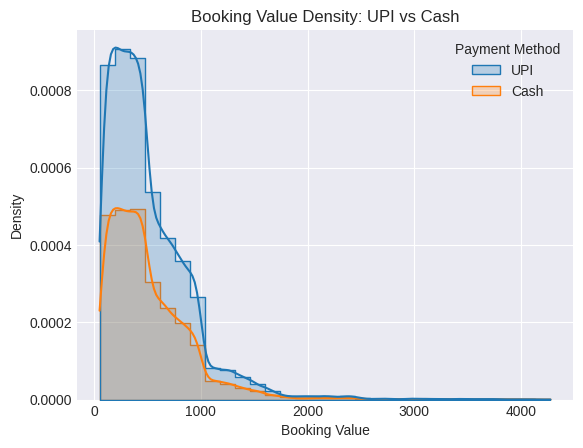

In [ ]:
filter_df=uber_ride[uber_ride["Payment Method"].isin(["UPI","Cash"])]
sns.histplot(
    data=filter_df,
    x="Booking Value",
    hue="Payment Method",
    bins=30,
    kde=True,
    element="step",
    stat="density"
)
plt.title("Booking Value Density: UPI vs Cash")
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu #use when data is not normally distributed
stat, p_value = mannwhitneyu(booking_value_upi, booking_value_cash)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
alpha = 0.05
if p_value > alpha:
    print("Fail to reject h0 : No strong evidence to reject h0")
else:
    print("Reject h0")

Statistics=1177.00, p=0.62
Fail to reject h0 : No strong evidence to reject h0


**Although the KDE plot suggested a slight right shift for UPI and Cash booking values, both the independent t-test and the Mann–Whitney U test <br>failed to detect a statistically significant difference between UPI and Cash payments (t = −0.66, p = 0.51; U = 1177, p = 0.62).
<br>Hence, we fail to reject the null hypothesis.**<br>

**Why use Mann–Whitney if t-test gives same result?** <br>
*The data was right-skewed with outliers, so Mann–Whitney was more appropriate. The fact that both tests agree strengthens the conclusion.*


# Question -3 : **Did Avg VTAT reduce after a system update?**

- Avg VTAT : Average time for driver to reach pickup location (in minutes)

Time split

- Use Date to define:

    - Before update

    - After update

**Update_date=** *2024-06-15*

In [ ]:
Update_date= "2024-06-15"
uber_ride.Date= pd.to_datetime(uber_ride.Date)
before=uber_ride[uber_ride.Date <Update_date]
after=uber_ride[uber_ride.Date >=Update_date]

In [ ]:
print("Number of data after update :",len(after))
print("Number of data before update :",len(before))

Number of data after update : 81689
Number of data before update : 68311


In [ ]:
before_loc=(before
            .groupby("Pickup Location")["Avg VTAT"]
            .mean()
            .reset_index(name="vtat_before"))

after_loc=(after
            .groupby("Pickup Location")["Avg VTAT"]
            .mean()
            .reset_index(name="vtat_after"))

In [ ]:
paired_df=before_loc.merge(after_loc,
                          on="Pickup Location",
                          how="inner"
                          )
paired_df.head()

,Pickup Location,vtat_before,vtat_after
0,AIIMS,8.119202,8.422907
1,Adarsh Nagar,8.396317,8.432506
2,Akshardham,8.547753,8.403774
3,Ambience Mall,8.701842,8.522811
4,Anand Vihar,8.623864,8.559361


**Same pickup location, before vs after**

In [ ]:
paired_df["diff"]=paired_df.vtat_before - paired_df.vtat_after
paired_df.head()

,Pickup Location,vtat_before,vtat_after,diff
0,AIIMS,8.119202,8.422907,-0.303705
1,Adarsh Nagar,8.396317,8.432506,-0.036188
2,Akshardham,8.547753,8.403774,0.143979
3,Ambience Mall,8.701842,8.522811,0.179031
4,Anand Vihar,8.623864,8.559361,0.064503


**Hypothesis :**<br>
- Ho : μ = 0 (No reduction)
- H1 : μ > 0 (VTAT reduce)

In [ ]:
paired_df_before=paired_df["vtat_before"].dropna().sample(35,random_state=42)
paired_df_after=paired_df["vtat_after"].dropna().sample(35,random_state=42)

In [ ]:
stat,p =wilcoxon(
    paired_df_before,
    paired_df_after
)

print("Wilcoxon Signed Rank Test Statistic:", stat)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis: There is a VTAT reduce after system update")
else:
    print("Fail to reject the null hypothesis .")

Wilcoxon Signed Rank Test Statistic: 260.0
p-value: 0.3765889282221906
Fail to reject the null hypothesis .


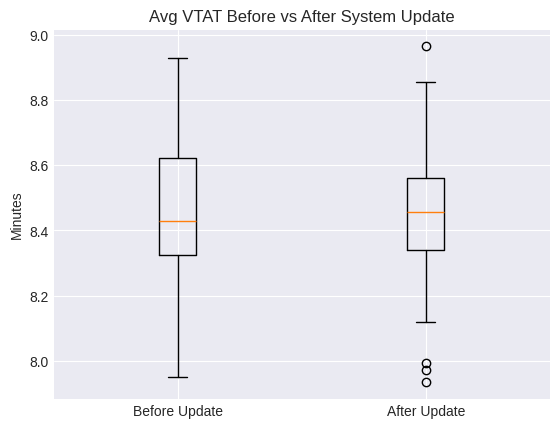

In [ ]:
plt.boxplot(
    [paired_df['vtat_before'], paired_df['vtat_after']],
    labels=['Before Update', 'After Update']
)
plt.title('Avg VTAT Before vs After System Update')
plt.ylabel('Minutes')
plt.show()


**Although a few lower VTAT values appear after the update, the overall distribution and median do not shift downward. Any observed differences are small and not practically or statistically significant.**

# **Question -4: Is Payment Method independent of Booking Status?**

**Hypothesis :**<br>
- Ho : Independent
- H1 : dependent

In [ ]:
uber_ride["Booking Status"].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

* 'No Driver Found' : 0,
* 'Incomplete' : 1,
* 'Completed' : 2,
* 'Cancelled by Driver' : 3,
* 'Cancelled by Customer' : 4

In [ ]:
uber_ride["Booking Status"]=uber_ride["Booking Status"].map({
    'No Driver Found' : 0,
    'Incomplete' : 1,
    'Completed' : 2,
    'Cancelled by Driver' : 3,
    'Cancelled by Customer' : 4
    }).astype(int)

* 'UPI' : 0,
* 'Debit Card' : 1,
* 'Cash' : 2,
* 'Uber Wallet' : 3,
* 'Credit Card' :4

In [ ]:
uber_ride["Payment Method"]=uber_ride["Payment Method"].dropna().map({
    'UPI' : 0,
    'Debit Card' : 1,
    'Cash' : 2,
    'Uber Wallet' : 3,
    'Credit Card' : 4
}).astype(int)

In [ ]:
pay_booking=uber_ride[["Payment Method","Booking Status"]].dropna().sample(30,random_state=42)

![image.png](attachment:987451e6-c27b-463f-9b26-cb5af416b99e.png)

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(pay_booking)
alpha=0.05
print("p value is :" + str(p))
print("stat is :" + str(stat))
print("dof is :" + str(dof))

if p > alpha :
    print("Fail to reject the null hypothesis")
else :
    print("Reject null hypothesis : both are dependent")

p value is :0.3670258821005384
stat is :30.966064586754243
dof is :29
Fail to reject the null hypothesis


**Proof:**

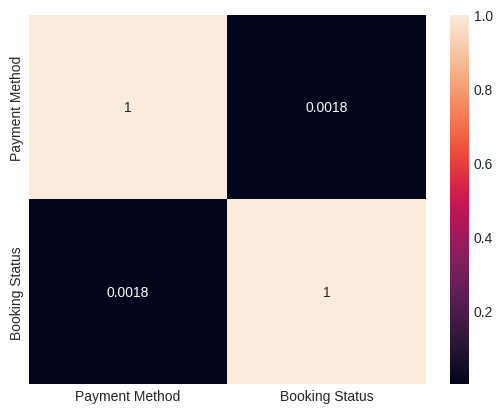

In [ ]:
sns.heatmap(uber_ride[["Payment Method","Booking Status"]].corr(),annot=True)
plt.show()

**Here we can see both (payement method and booking status are independent)**

# **Question - 5 : Does distance affect fare?**

In [ ]:
distance_fare=uber_ride[["Ride Distance","Booking Value"]]

**Hypothesis:** <br>

*  Ho : Distance and fare are not correlated (𝑟=0)
* H1 : Distance and fare are correlated (𝑟≠0)

In [ ]:
distance_fare_d=distance_fare["Ride Distance"].dropna().sample(30,random_state=42)
distance_fare_bv=distance_fare["Booking Value"].dropna().sample(30,random_state=42)

In [ ]:
stats,p_value =stats.spearmanr(distance_fare_d,distance_fare_bv)
alpha=0.05
print("Statistics :",stats)
print("p_value :",p_value)
if p_value > alpha:
    print("Fail to reject null hypothesis : Distance and fare are not correlated (𝑟=0)")
else:
    print("Reject null hypothesie : Distance and fare are  correlated (𝑟≠0)")

Statistics : 0.1488485936455096
p_value : 0.4324401013542343
Fail to reject null hypothesis : Distance and fare are not correlated (𝑟=0)


**Spearman correlation analysis shows no statistically significant association between ride distance and booking value (stats ≈ 0.15, p > 0.05), indicating that distance alone does not explain fare variation in this dataset.**

**Prove by heatmap**

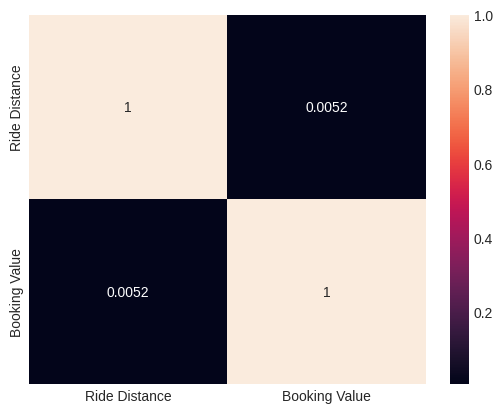

In [ ]:
sns.heatmap(distance_fare.corr(),annot=True)
plt.show()

**For this dataset, Ride Distance and Booking Value are not significantly correlated.
The Spearman correlation test and heatmap both indicate a weak and statistically insignificant relationship.**

# Conclusion
This analysis provides evidence-based insights into Uber’s 2024 operations. Key findings include:

* Average booking value exceeds ₹350.
* Payment method does not significantly affect booking value or status.
* System update did not significantly reduce VTAT.
* Distance alone does not explain fare variation.

These results can inform strategic decisions in pricing, operational updates, and customer experience improvements.